# Examples

The following examples show how to use the loader APIs:

## 1. Parsing

This sample shows how to read a CWL document from a remote public URL:

In [ ]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl')

## 1.1 Check the parsed document

In [ ]:
import sys

cwl_loader.dump_cwl(cwl_document, sys.stderr)

## 2. Components diagram



This sample shows how to write a CWL document to a stream (string, file, ...):

## 2.1 PlantUML `state` diagram

/'
 ' Diagram generated by cwl2puml v0.9.0
 ' timestamp: 2025-09-20T00:49:58.253
 '/
@startuml
hide empty description






    

    

    

    

    

    
state "water-bodies" as water_bodies {
        
    state "stac_api_endpoint" as water_bodies_stac_api_endpoint <<entryPoint>>
        
    state "search_request" as water_bodies_search_request <<entryPoint>>
        
    state "bands" as water_bodies_bands <<entryPoint>>
        


    
        

        
            
        
            
        
            
        
            
        
            
        
            
        
            
        
            
        
            
        

        
    state discovery {
            
        state "api_endpoint" as discovery_api_endpoint <<entryPoint>>
        water_bodies_stac_api_endpoint --> discovery_api_endpoint
            
        state "search_request" as discovery_search_request <<entryPoint>>
        water_bodies_search_request --> discovery_search_request
  

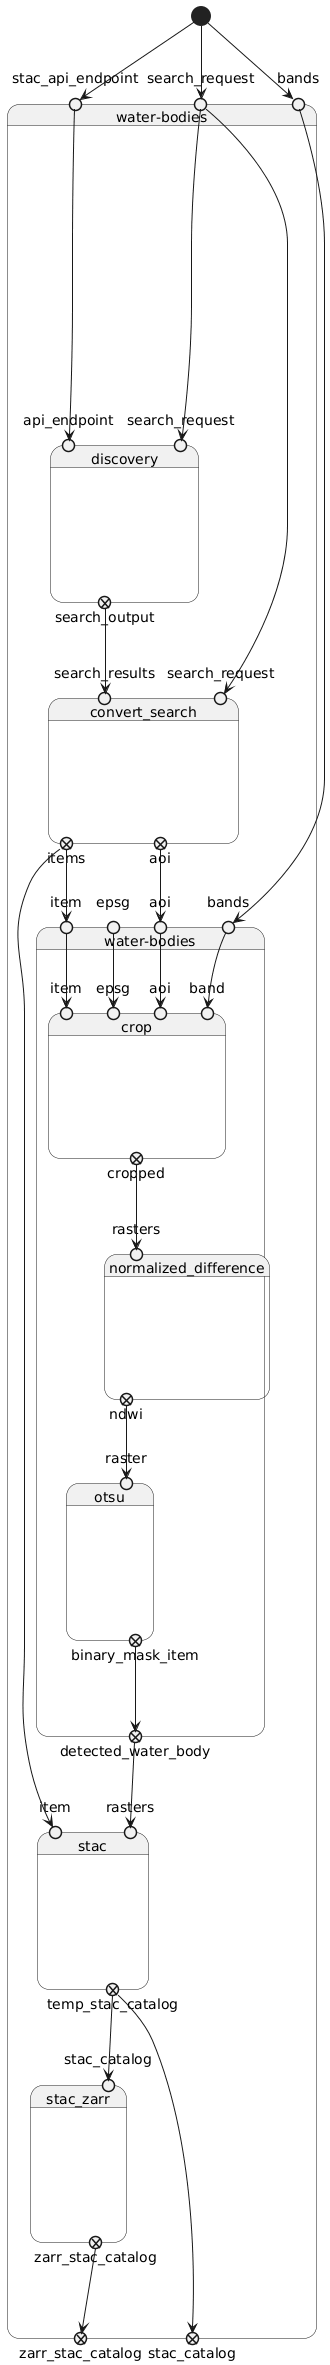

In [ ]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import (
    display,
    Markdown,
    display_png
)
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

for i, diagram_type in enumerate(DiagramType):
    index = i + 1
    display(Markdown(f"## 2.{index} PlantUML `{diagram_type.name.lower()}` diagram"))

    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)